<center>
<img src="https://upload.wikimedia.org/wikipedia/fr/thumb/1/1d/Logo_T%C3%A9l%C3%A9com_SudParis.svg/1014px-Logo_T%C3%A9l%C3%A9com_SudParis.svg.png" width="15%"></img>
</center>

<center> <h2> NET 4103/7431 Complex Network </h2> </center>

<center> <h3> Vincent Gauthier (vincent.gauthier@telecom-sudparis.eu) </h3> </center>

<center>
<h3>NET 4103/7431 Homework Network science and Graph Learning</h3>
</center>

In [4]:
NOM = "CHICAS"
PRENOM = "YEISSON"

<h3>Solution</h3>

###Setup and import

In [5]:
# Google Drive
from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


In [6]:
# Style pour le Notebook
from IPython.core.display import HTML

def css_styling():
    styles = open("/content/drive/My Drive/Colab Notebooks/NA/styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

In [7]:
import networkx as nx
import matplotlib.pylab as plt

%matplotlib inline

# Question 4
import numpy as np
from random import random, seed
import math

### Question 1: Reading

###Question 2: Social Network Analysis with the Facebook100 Dataset

Lets use three networks from the FB100: Caltech (with 762 nodes in the LCC), MIT (which has 6402 nodes in the LCC), and Johns Hopkins (which has 5157 nodes in the LCC).

In [ ]:
import networkx as nx

NCaltech = nx.read_graphml("/content/drive/My Drive/Colab Notebooks/NA/Homework/data/Caltech36.graphml")
NMIT = nx.read_graphml("/content/drive/My Drive/Colab Notebooks/NA/Homework/data/MIT8.graphml")
NJH = nx.read_graphml("/content/drive/My Drive/Colab Notebooks/NA/Homework/data/Johns Hopkins55.graphml")

**(a) Plot Degree Distribution**

In [ ]:
#Import libs
import matplotlib.pyplot as plt
import numpy as np

# Define first Plot Degree
def plot_degreei(G):
  degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
  hist, bin_edges = np.histogram(degree_sequence, density=True)
  plt.semilogy(bin_edges[:-1], hist, 'o', ms=15)
  plt.xlabel(r"$k$, degree ")
  plt.ylabel(r"PDF")
  plt.ylim(1e-3, 1)
  plt.title("degree distribution")

def plot_degreeii(G):
    degrees = [G.degree(n) for n in G.nodes()]
    plt.hist(degrees, bins='auto')
    plt.show()




Caltech Results

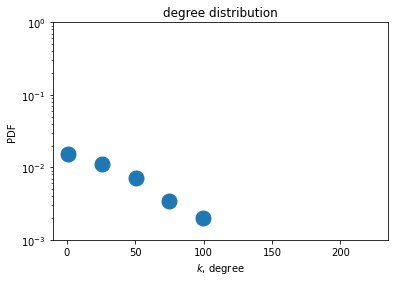

In [ ]:
plot_degreei(NCaltech)

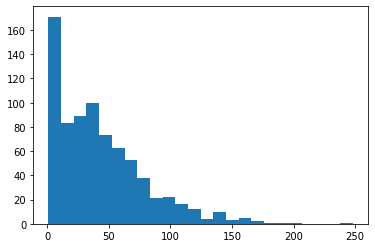

In [ ]:
# Histogram
plot_degreeii(NCaltech)

MIT results

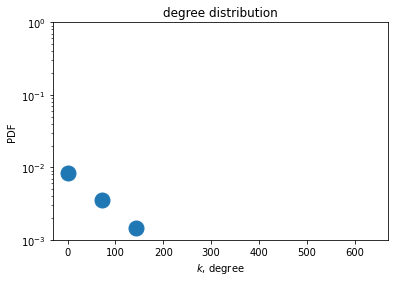

In [ ]:
# Plot
plot_degreei(NMIT)

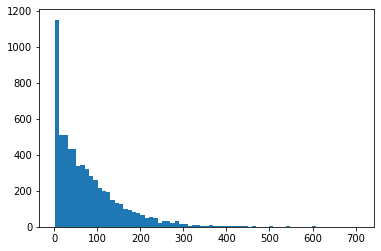

In [ ]:
# Histogram
plot_degreeii(NMIT)

Johns Hopkins results

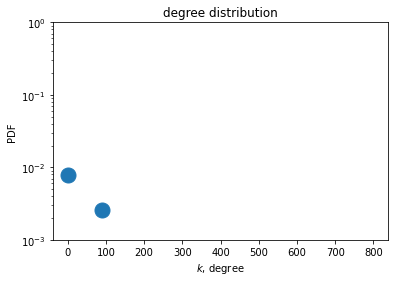

In [ ]:
# Plot
plot_degreei(NJH)

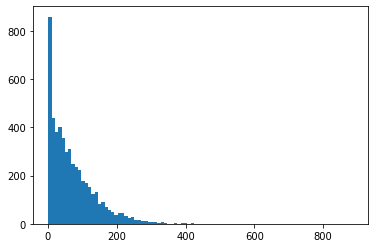

In [ ]:
# Histogram
plot_degreeii(NJH)

**What are you able to conclude from these degree distributions?**

Answer:
We can conclude that many people in the beginning were networked in their networks of each university only with people of the same degree, the same class, the same room having more clustering, and not with people from other faculties, even if they were in the same university or with a higher degree.


**(b) Compute the global clustering coefficient and mean local clustering coefficient and edge density**

In [ ]:
# Global Clustering
GCCaltech = nx.transitivity(NCaltech)
print('Caltech - Global Clustering : ', GCCaltech)

GCMIT = nx.transitivity(NMIT)
print('MIT - Global Clustering : ', GCMIT)

GCJH = nx.transitivity(NJH)
print('Johns Hopkins - Global Clustering : ', GCJH)

Caltech - Global Clustering :  0.2912826901150874
MIT - Global Clustering :  0.18028845093502427
Johns Hopkins - Global Clustering :  0.19316123901594015


In [ ]:
# Mean Local Clustering
MCCaltech = nx.average_clustering(NCaltech)
print('Caltech - Mean Local Clustering : ', MCCaltech)

MCMIT = nx.average_clustering(NMIT)
print('MIT - Mean Local Clustering : ', MCMIT)

MCJH = nx.average_clustering(NJH)
print('Johns Hopkins - Mean Local Clustering : ', MCJH)


Caltech - Mean Local Clustering :  0.40929439048517247
MIT - Mean Local Clustering :  0.2712187419501315
Johns Hopkins - Mean Local Clustering :  0.26839307371293525


In [ ]:
# Edge Density
EDCaltech = nx.density(NCaltech)
print('Caltech - Edge Density : ', EDCaltech)

EDMIT = nx.density(NMIT)
print('MIT - Edge Density : ', EDMIT)

EDJH = nx.density(NJH)
print('Johns Hopkins - Edge Density : ', EDJH)

Caltech - Edge Density :  0.05640442132639792
MIT - Edge Density :  0.012118119495041378
Johns Hopkins - Edge Density :  0.013910200162372396


**Should either of these networks be construed as sparse?**

Answer:
I would answer that networks sparse, because even if we have a cluster of friends, that does not mean that my friends' friends know each other. Which is quite logical if we apply it to the situation at university, where you cannot even know all the people in your own faculty. Therefore, the 3 networks can be considered as sparse.

**(c) Draw a scatter plot of the degree versus local clustering coefficient**

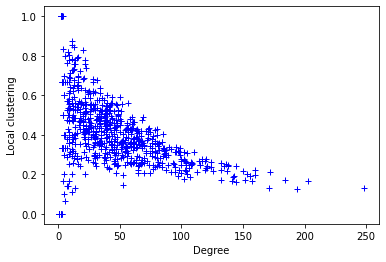

In [ ]:
# Get Deg
def deg(list):
  d = 0
  for i in list:
    if i[1] > d:
      d = i[1]
  return d

# X Axis
x = [deg(NCaltech.degree), deg(NMIT.degree), deg(NJH.degree)]
# Y Axis
y = [MCCaltech, MCMIT, MCJH]


degree_NCaltech = [val for (node, val) in NCaltech.degree]
degree_NMIT = [val for (node, val) in NMIT.degree]
degree_NJH = [val for (node, val) in NJH.degree]
CNCaltech = nx.clustering(NCaltech)
CNMIT = nx.clustering(NMIT)
CNJH = nx.clustering(NJH)



# Caltech
plt.xlabel(r"Degree")
plt.ylabel(r"Local clustering")

plt.plot(degree_NCaltech, list(CNCaltech.values()),'+', color='blue');

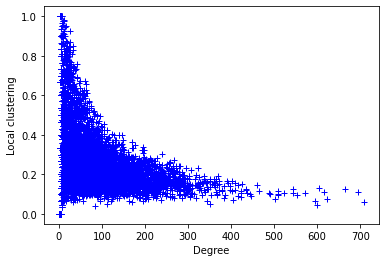

In [ ]:
# MIT
plt.xlabel(r"Degree")
plt.ylabel(r"Local clustering")

plt.plot(degree_NMIT, list(CNMIT.values()),'+', color='blue');

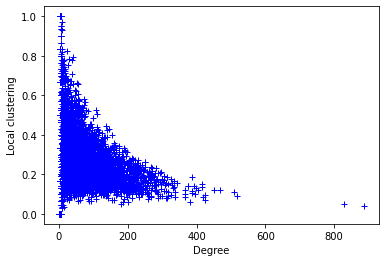

In [ ]:
# Johns Hopkins
plt.xlabel(r"Degree")
plt.ylabel(r"Local clustering")

plt.plot(degree_NJH, list(CNJH.values()),'+', color='blue');

**Are you able to draw any conclusions about any similarities or differences between the tree networks? What other observations can you make?**

Answer:

*  It is interesting to note the similarities between Jhons Kopkins and MIT, which show exponential behavior. We can see that most clusters are formed in the lower degrees. Here one can have more friends than, for example, in high degrees where there are not so many clusters of friends.
*  Caltech has similar behavior but is not as similar to the other two.



##Question 3: Social Network Analysis with the Facebook100 Dataset

Using the FB100 networks, investigate the assortativity patterns for three vertex attributes: (i) student/faculty status, (ii) major, (iii) vertex degree, and (iiii) dorm. Treat these networks as simple graphs in your analysis.

In [ ]:
# Importing Networks

N1 = nx.read_graphml("/content/drive/My Drive/Colab Notebooks/NA/Homework/data/Bingham82.graphml")
N2 = nx.read_graphml("/content/drive/My Drive/Colab Notebooks/NA/Homework/data/Brandeis99.graphml")
N3 = nx.read_graphml("/content/drive/My Drive/Colab Notebooks/NA/Homework/data/Brown11.graphml")
N4 = nx.read_graphml("/content/drive/My Drive/Colab Notebooks/NA/Homework/data/Colgate88.graphml")
N5 = nx.read_graphml("/content/drive/My Drive/Colab Notebooks/NA/Homework/data/Harvard1.graphml")
N6 = nx.read_graphml("/content/drive/My Drive/Colab Notebooks/NA/Homework/data/Lehigh96.graphml")
N7 = nx.read_graphml("/content/drive/My Drive/Colab Notebooks/NA/Homework/data/Maryland58.graphml")
N8 = nx.read_graphml("/content/drive/My Drive/Colab Notebooks/NA/Homework/data/MIT8.graphml")
N9 = nx.read_graphml("/content/drive/My Drive/Colab Notebooks/NA/Homework/data/Northeastern19.graphml")
N10 = nx.read_graphml("/content/drive/My Drive/Colab Notebooks/NA/Homework/data/Oberlin44.graphml")

Network 1 -> Bingham82

In [ ]:
# Network 1
print("Student faculty: ", nx.attribute_assortativity_coefficient(N1, "student_fac"))
print("Major: ", nx.attribute_assortativity_coefficient(N1, "major_index"))
print("Degree: ", nx.degree_assortativity_coefficient(N1))
print("Dorm: ", nx.attribute_assortativity_coefficient(N1, "dorm"))
print("Size: ", N1.size())

Student faculty:  0.28566560558585763
Major:  0.04680298160715487
Degree:  0.13736406472255802
Dorm:  0.16444205050113206
Size:  362894


Network 2 -> Brandeis99

In [ ]:
# Network 2
print("Student faculty: ", nx.attribute_assortativity_coefficient(N2, "student_fac"))
print("Major: ", nx.attribute_assortativity_coefficient(N2, "major_index"))
print("Degree: ", nx.degree_assortativity_coefficient(N2))
print("Dorm: ", nx.attribute_assortativity_coefficient(N2, "dorm"))
print("Size: ", N2.size())

Student faculty:  0.3739665668785806
Major:  0.03997525544631663
Degree:  -0.025515330213873477
Dorm:  0.17899209844438788
Size:  137567


Network 3 -> Brown11

In [ ]:
# Network 3
print("Student faculty: ", nx.attribute_assortativity_coefficient(N3, "student_fac"))
print("Major: ", nx.attribute_assortativity_coefficient(N3, "major_index"))
print("Degree: ", nx.degree_assortativity_coefficient(N3))
print("Dorm: ", nx.attribute_assortativity_coefficient(N3, "dorm"))
print("Size: ", N3.size())

Student faculty:  0.42455744202161066
Major:  0.03912469612684111
Degree:  0.06938877121976816
Dorm:  0.10272238407816026
Size:  384526


Network 4 -> Colgate88

In [ ]:
# Network 4
print("Student faculty: ", nx.attribute_assortativity_coefficient(N4, "student_fac"))
print("Major: ", nx.attribute_assortativity_coefficient(N4, "major_index"))
print("Degree: ", nx.degree_assortativity_coefficient(N4))
print("Dorm: ", nx.attribute_assortativity_coefficient(N4, "dorm"))
print("Size: ", N4.size())

Student faculty:  0.4409103362420721
Major:  0.05220371082480271
Degree:  0.0670008825165129
Dorm:  0.15031593379176325
Size:  155043


Network 5 -> Harvard1

In [ ]:
# Network 5
print("Student faculty: ", nx.attribute_assortativity_coefficient(N5, "student_fac"))
print("Major: ", nx.attribute_assortativity_coefficient(N5, "major_index"))
print("Degree: ", nx.degree_assortativity_coefficient(N5))
print("Dorm: ", nx.attribute_assortativity_coefficient(N5, "dorm"))
print("Size: ", N5.size())

Student faculty:  0.5426250622894172
Major:  0.04967692832862898
Degree:  0.14505488767109062
Dorm:  0.12567663504955817
Size:  824617


Network 6 -> Lehigh96

In [ ]:
# Network 6
print("Student faculty: ", nx.attribute_assortativity_coefficient(N6, "student_fac"))
print("Major: ", nx.attribute_assortativity_coefficient(N6, "major_index"))
print("Degree: ", nx.degree_assortativity_coefficient(N6))
print("Dorm: ", nx.attribute_assortativity_coefficient(N6, "dorm"))
print("Size: ", N6.size())

Student faculty:  0.3067075189254781
Major:  0.04255744757751177
Degree:  0.03514352338363369
Dorm:  0.23144081638138456
Size:  198347


Network 7 -> Maryland58

In [ ]:
# Network 7
print("Student faculty: ", nx.attribute_assortativity_coefficient(N7, "student_fac"))
print("Major: ", nx.attribute_assortativity_coefficient(N7, "major_index"))
print("Degree: ", nx.degree_assortativity_coefficient(N7))
print("Dorm: ", nx.attribute_assortativity_coefficient(N7, "dorm"))
print("Size: ", N7.size())

Student faculty:  0.27331771145095285
Major:  0.05139728013103488
Degree:  0.0014223562911621689
Dorm:  0.16127867734331042
Size:  744862


Network 8 -> MIT8

In [ ]:
# Network 8
print("Student faculty: ", nx.attribute_assortativity_coefficient(N8, "student_fac"))
print("Major: ", nx.attribute_assortativity_coefficient(N8, "major_index"))
print("Degree: ", nx.degree_assortativity_coefficient(N8))
print("Dorm: ", nx.attribute_assortativity_coefficient(N8, "dorm"))
print("Size: ", N8.size())

Student faculty:  0.315240859602468
Major:  0.058067301827022307
Degree:  0.12005101145668985
Dorm:  0.17879641483565542
Size:  251252


Network 9 -> Notheastern19

In [ ]:
# Network 9
print("Student faculty: ", nx.attribute_assortativity_coefficient(N9, "student_fac"))
print("Major: ", nx.attribute_assortativity_coefficient(N9, "major_index"))
print("Degree: ", nx.degree_assortativity_coefficient(N9))
print("Dorm: ", nx.attribute_assortativity_coefficient(N9, "dorm"))
print("Size: ", N9.size())

Student faculty:  0.27357727603212667
Major:  0.09708983846144985
Degree:  0.06817059301790454
Dorm:  0.15133747674027956
Size:  381934


Network 10 -> Oberlin44

In [ ]:
# Network 10
print("Student faculty: ", nx.attribute_assortativity_coefficient(N10, "student_fac"))
print("Major: ", nx.attribute_assortativity_coefficient(N10, "major_index"))
print("Degree: ", nx.degree_assortativity_coefficient(N10))
print("Dorm: ", nx.attribute_assortativity_coefficient(N10, "dorm"))
print("Size: ", N10.size())

Student faculty:  0.23011231473520424
Major:  0.09350709613377944
Degree:  0.05008017692087402
Dorm:  0.14980232456217782
Size:  89912


### Student Faculty

[0.28566560558585763, 0.3739665668785806, 0.42455744202161066, 0.4409103362420721, 0.5426250622894172, 0.3067075189254781, 0.27331771145095285, 0.315240859602468, 0.27357727603212667, 0.23011231473520424]
[362894, 137567, 384526, 155043, 824617, 198347, 744862, 251252, 381934, 89912]


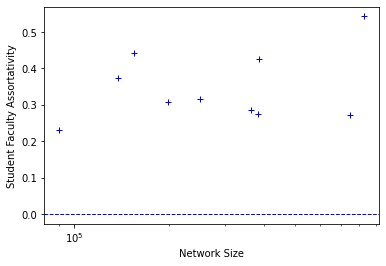

In [ ]:
# Scatter plot Assortativity vrs Network Size

# Networks
Networks = [N1, N2, N3, N4, N5, N6, N7, N8, N9, N10]
# Store assortative faculty and network size
all_facult = []
all_Nsize = []

for i in range(0,10):
  all_Nsize.append(Networks[i].size())
  all_facult.append(nx.attribute_assortativity_coefficient(Networks[i], "student_fac"))

print(all_facult)
print(all_Nsize)

# plot
plt.xlabel(r"Network Size")
plt.ylabel(r"Student Faculty Assortativity")
plt.xscale('log')
plt.axhline(linewidth=1, color='b', linestyle='--')
plt.plot(all_Nsize, all_facult, '+', color='blue');


Histogram assortative Faculty


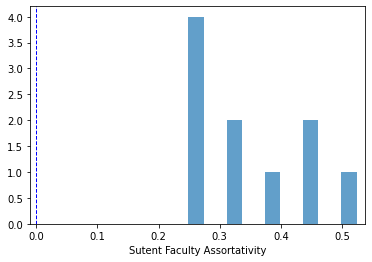

In [ ]:
# Histogram
plt.hist(all_facult, bins='auto', alpha=0.7, rwidth=0.4)
plt.xlim(left=-0.01)
plt.axvline(linewidth=1, color='b', linestyle='--')
plt.xlabel(r"Sutent Faculty Assortativity")
plt.show()


### Major

[0.04680298160715487, 0.03997525544631663, 0.03912469612684111, 0.05220371082480271, 0.04967692832862898, 0.04255744757751177, 0.05139728013103488, 0.058067301827022307, 0.09708983846144985, 0.09350709613377944]
[362894, 137567, 384526, 155043, 824617, 198347, 744862, 251252, 381934, 89912]


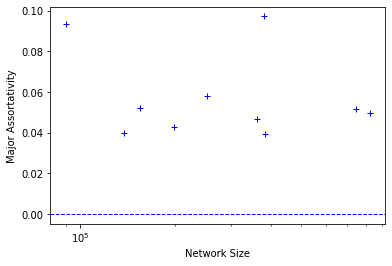

In [ ]:
# Scatter plot Assortativity vrs Network Size

# Store assortative faculty and network size
all_major = []


for i in range(0,10):
  all_major.append(nx.attribute_assortativity_coefficient(Networks[i], "major_index"))

print(all_major)
print(all_Nsize)

# plot
plt.xlabel(r"Network Size")
plt.ylabel(r"Major Assortativity")
plt.xscale('log')
# plt.ylim(-0.1, 0.60)
plt.axhline(linewidth=1, color='b', linestyle='--')
plt.plot(all_Nsize, all_major, '+', color='blue');


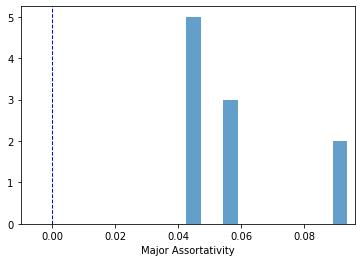

In [ ]:
# Histogram
plt.hist(all_major, bins='auto', alpha=0.7, rwidth=0.4)
plt.xlim(left=-0.01)
plt.axvline(linewidth=1, color='b', linestyle='--')
plt.xlabel(r"Major Assortativity")
plt.show()

### Degree

[0.13736406472255802, -0.025515330213873477, 0.06938877121976816, 0.0670008825165129, 0.14505488767109062, 0.03514352338363369, 0.0014223562911621689, 0.12005101145668985, 0.06817059301790454, 0.05008017692087402]
[362894, 137567, 384526, 155043, 824617, 198347, 744862, 251252, 381934, 89912]


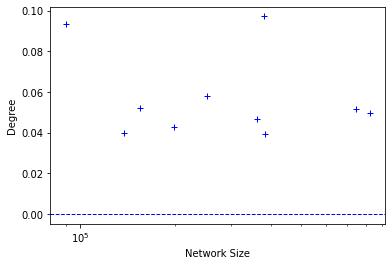

In [ ]:
# Scatter plot Assortativity vrs Network Size

# Store assortative faculty and network size
all_degree = []


for i in range(0,10):
  all_degree.append(nx.degree_assortativity_coefficient(Networks[i]))

print(all_degree)
print(all_Nsize)

# plot
plt.xlabel(r"Network Size")
plt.ylabel(r"Degree")
plt.xscale('log')
# plt.ylim(-0.1, 0.60)
plt.axhline(linewidth=1, color='b', linestyle='--')
plt.plot(all_Nsize, all_major, '+', color='blue');

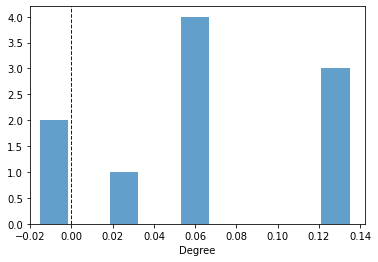

In [ ]:
# Histogram
plt.hist(all_degree, bins='auto', alpha=0.7, rwidth=0.4)
plt.xlim(left=-0.02)
plt.axvline(linewidth=1, color='b', linestyle='--')
plt.xlabel(r"Degree")
plt.show()

### Dorm

[0.16444205050113206, 0.17899209844438788, 0.10272238407816026, 0.15031593379176325, 0.12567663504955817, 0.23144081638138456, 0.16127867734331042, 0.17879641483565542, 0.15133747674027956, 0.14980232456217782]
[362894, 137567, 384526, 155043, 824617, 198347, 744862, 251252, 381934, 89912]


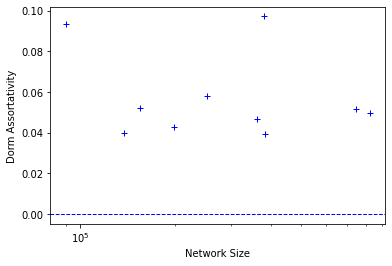

In [ ]:
# Scatter plot Assortativity vrs Network Size

# Store assortative faculty and network size
all_dorm = []


for i in range(0,10):
  all_dorm.append(nx.attribute_assortativity_coefficient(Networks[i], "dorm"))

print(all_dorm)
print(all_Nsize)

# plot
plt.xlabel(r"Network Size")
plt.ylabel(r"Dorm Assortativity")
plt.xscale('log')
# plt.ylim(-0.1, 0.60)
plt.axhline(linewidth=1, color='b', linestyle='--')
plt.plot(all_Nsize, all_major, '+', color='blue');

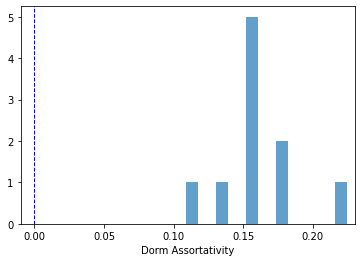

In [ ]:
# Histogram
plt.hist(all_dorm, bins='auto', alpha=0.7, rwidth=0.4)
plt.xlim(left=-0.01)
plt.axvline(linewidth=1, color='b', linestyle='--')
plt.xlabel(r"Dorm Assortativity")
plt.show()

### **Discuss**

Briefly discuss the degree to which vertices do or do not exhibit assortative mixing on each attribute, and speculate about what kind of processes or tendencies in the formation of Facebook friendships might produce this kind of pattern.


Answer:



*   Student Faculty: People who study in the same faculty or are in the same courses can be said to be friends in the network and therefore we can see the behavior of having a high assortativity.
*   Dorms: I can conclude that dorms have high assortativity, it makes sense because more people living in dorms or college buildings have friends from the same dorms.
*   Major : Looking at the Major results we can conclude that they are not related to making friends, that is why they have a low level of assortitivity.

In conclusion, when looking at the results of these attributes we can observe interesting behaviors which make sense. When wanting to create a friendship network, people will logically start making friends in closer nodes, for example with people who live in the same place, people who are in the same classes at the university, people who are in the same faculty.









Degree negative



##Question 4: Find missing labels with the label propagation algorithms

### A
**(a) Read the following document**

[link text](https://drive.google.com/file/d/1BggnKj43pRkbwXkUTz1rwo971HBF33CO/view?usp=sharing)

### B
**(b) Implement in python the label propagation algorithm [4], please consider pytorch1 and networkx2 for the development of your algorithm.**

In [8]:
# Definitions of functions

# Function to Normalize

def normalize_function(N):
    arrayNetwork = nx.to_numpy_array(N)
    sumNetwork = np.sum(arrayNetwork, axis=1)
    diagNetwork = np.diag(1./sumNetwork)
    return diagNetwork @ arrayNetwork

In [9]:
# Testing
Gn = nx.Graph()
Gn.add_edge(1, 2)
Gn.add_edge(1, 3)
Gn.add_edge(1, 4)
Gn.add_edge(2, 3)
Gn.add_edge(3, 4)
Gn.add_edge(4 ,5)
Gn.add_edge(4 ,6)
Gn.add_edge(5, 6)
Gn.add_edge(5, 7)
Gn.add_edge(5, 8)
# get Label Y
lenG = len(Gn)
label_y = np.zeros((lenG, 2))
label_y[5,1] = 1
label_y[6,1] = 1
label_y[0,0] = 1
label_y[1,0] = 1

labels_id = np.array([(5,1), (6,1), (0,0), (1,0)])

print("LABEL Y : ", label_y)
print("LABELS IDs  : ", labels_id)

LABEL Y :  [[1. 0.]
 [1. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [0. 1.]
 [0. 0.]]
LABELS IDs  :  [[5 1]
 [6 1]
 [0 0]
 [1 0]]


In [10]:
# Function to Label Propagation to get Label y
def label_propagation(N, label_y, labels_id, tol=1e-3, max_iter=1000):
    size_n = len(N)
    norm = normalize_function(N)
    copy_ylabel = label_y.copy()
    previous = np.zeros(label_y.shape)

    # iterations to 1000
    for _ in range(max_iter):
        var = np.abs(np.sum(previous - label_y))
        
        # if gets var lower than tol -> stop.
        if var < tol:
            break
        previous = label_y.copy()
        label_y = np.dot(norm, previous)
        label_y[labels_id] = copy_ylabel[labels_id]
        
    return label_y

In [117]:
# Algorithm Label Propagation

def complete_propagation(N, label, tol, percentage):
  size_network = len(N)

  # get node attributes
  nodes_values = nx.get_node_attributes(N, label)
  # print(node_values)

  # find the unique 
  node_uniquev = set( valor for i in nodes_values for valor in nodes_values.values())

  # convert list of the unique values
  unique_list = list(node_uniquev)
  size_unique = len(list(unique_list))
  
  # Percentage label and label copy
  per = math.ceil(size_network*percentage)
  label_y = np.zeros((size_network, size_unique))
  labely_backup = np.zeros((size_network, size_unique))
  # print(label_y)
  # print(labely_backup)
  
  aprox_vals = []
  index = per * math.floor(random() * 1/percentage)
  totals = index + per
  counter = 0

  # save the original value
  original_index = index

  # CORE
  for i in nodes_values:
    for j in range(size_unique):
      if nodes_values[i] == unique_list[j] and nodes_values[i] != 0 and index < totals and index <= counter:
          label_y[int(i), j] = 0
          labely_backup[int(i), j] = 1
          aprox_vals.append(counter)
          index = index + 1
      elif nodes_values[i] == unique_list[j] and nodes_values[i] != 0:
        label_y[int(i), j] = 1
        labely_backup[int(i), j] = 1
    counter = counter + 1

  label_ids = (label_y.sum(axis=1) == 1)
  labels_y = label_propagation(N, label_y, label_ids, tol)

  return labels_y, labely_backup, original_index, per

### C
**(c) Choose a network from The Facebook100 dataset and randomly select 10%, 20% and 30% of of the node attributes of the network to be remove. Use the label propagation algorithm you implemented to recover the missing attributes. perform this operation for each of the following attributes : the ”dorm”, ”major”, ”gender”.**

Network to use as example

In [12]:
N11 = nx.read_graphml("/content/drive/My Drive/Colab Notebooks/NA/Homework/data/Duke14.graphml")

#### 10% 


1.   Dorm
2.   Major
2.   Gender



Dorm

In [118]:
dorm01_labelsy, dorm01_labelsy_backup, dorm01_index, dorm01_per = complete_propagation(N11, 'dorm', 1e-3, 0.1)
print("Labels Y : ", dorm01_labelsy)
print("Labels Y back : ", dorm01_labelsy_backup)
print("Index : ", dorm01_index)
print("Percentage : ", dorm01_per)

Labels Y :  [[0.         0.00096613 0.00375479 ... 0.00229907 0.0006241  0.0006031 ]
 [0.         0.0009906  0.00060922 ... 0.01038827 0.00075672 0.00055127]
 [0.         0.00206545 0.00638247 ... 0.00719142 0.01021469 0.00143532]
 ...
 [0.         0.00039359 0.00269563 ... 0.00099406 0.00078515 0.00030262]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.0019191  0.00204669 ... 0.00096429 0.01119826 0.00446077]]
Labels Y back :  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Index :  0
Percentage :  990


Major

In [119]:
major01_labelsy, major01_labelsy_backup, major01_index, major01_per = complete_propagation(N11, 'major_index', 1e-3, 0.1)
print("Labels Y : ", major01_labelsy)
print("Labels Y back : ", major01_labelsy_backup)
print("Index : ", major01_index)
print("Percentage : ", major01_per)

Labels Y :  [[0.00000000e+00 4.75366962e-04 1.23613727e-04 ... 6.20140203e-04
  7.63712593e-07 1.45768827e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 7.77629614e-04 4.26888210e-02 ... 1.23141471e-03
  6.54085315e-06 2.24519196e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]
Labels Y back :  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Index :  7920
Percentage :  990


Gender

In [120]:
gender01_labelsy, gender01_labelsy_backup, gender01_index, gender01_per = complete_propagation(N11, 'gender', 1e-3, 0.1)
print("Labels Y : ", gender01_labelsy)
print("Labels Y back : ", gender01_labelsy_backup)
print("Index : ", gender01_index)
print("Percentage : ", gender01_per)

Labels Y :  [[0.         0.28571429 0.71428571]
 [0.         0.         1.        ]
 [0.         1.         0.        ]
 ...
 [0.         0.69867134 0.30132866]
 [0.         0.         1.        ]
 [0.         1.         0.        ]]
Labels Y back :  [[0. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 ...
 [0. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]
Index :  1980
Percentage :  990


#### 20% 


1.   Dorm
2.   Major
2.   Gender



Dorm

In [124]:
dorm02_labelsy, dorm02_labelsy_backup, dorm02_index, dorm02_per = complete_propagation(N11, 'dorm', 1e-3, 0.2)
print("Labels Y : ", dorm02_labelsy)
print("Labels Y back : ", dorm02_labelsy_backup)
print("Index : ", dorm02_index)
print("Percentage : ", dorm02_per)

Labels Y :  [[0.         0.00090894 0.00130763 ... 0.00209476 0.00011023 0.00087202]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.00087833 0.00247982 ... 0.0008782  0.00034251 0.00058387]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00599869 0.00216788 ... 0.00136796 0.00043567 0.00698329]]
Labels Y back :  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Index :  3958
Percentage :  1979


Major

In [125]:
major02_labelsy, major02_labelsy_backup, major02_index, major02_per = complete_propagation(N11, 'major_index', 1e-3, 0.2)
print("Labels Y : ", major02_labelsy)
print("Labels Y back : ", major02_labelsy_backup)
print("Index : ", major02_index)
print("Percentage : ", major02_per)

Labels Y :  [[0.00000000e+00 1.11657860e-04 1.88352209e-04 ... 6.89298880e-04
  8.98155155e-06 3.59313442e-06]
 [0.00000000e+00 6.17201881e-04 8.96815548e-03 ... 3.07196617e-04
  1.34073052e-05 5.86605491e-06]
 [0.00000000e+00 3.09531651e-02 1.26213559e-03 ... 4.95921893e-03
  1.07207317e-04 4.26431845e-05]
 ...
 [0.00000000e+00 1.07025428e-03 6.84213660e-04 ... 1.15997911e-03
  1.65802879e-05 1.61823951e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]
Labels Y back :  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Index :  0
Percentage :  1979


Gender

In [126]:
gender02_labelsy, gender02_labelsy_backup, gender02_index, gender02_per = complete_propagation(N11, 'gender', 1e-3, 0.2)
print("Labels Y : ", gender02_labelsy)
print("Labels Y back : ", gender02_labelsy_backup)
print("Index : ", gender02_index)
print("Percentage : ", gender02_per)

Labels Y :  [[0.         0.38760607 0.61239393]
 [0.         0.         1.        ]
 [0.         1.         0.        ]
 ...
 [0.         0.72321437 0.27678563]
 [0.         0.         1.        ]
 [0.         1.         0.        ]]
Labels Y back :  [[0. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 ...
 [0. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]
Index :  3958
Percentage :  1979


#### 30% 


1.   Dorm
2.   Major
2.   Gender



Dorm

In [132]:
dorm03_labelsy, dorm03_labelsy_backup, dorm03_index, dorm03_per = complete_propagation(N11, 'dorm', 1e-3, 0.3)
print("Labels Y : ", dorm03_labelsy)
print("Labels Y back : ", dorm03_labelsy_backup)
print("Index : ", dorm03_index)
print("Percentage : ", dorm03_per)

Labels Y :  [[0.         0.00121866 0.00442899 ... 0.00186336 0.00116018 0.00067106]
 [0.         0.00140078 0.00124817 ... 0.00610269 0.00149233 0.00073884]
 [0.         0.00314346 0.0081665  ... 0.00808415 0.00625024 0.00245191]
 ...
 [0.         0.00132877 0.00520043 ... 0.00193247 0.00219444 0.00081625]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00279002 0.00328015 ... 0.00203134 0.01773794 0.00270503]]
Labels Y back :  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Index :  0
Percentage :  2969


Major

In [133]:
major03_labelsy, major03_labelsy_backup, major03_index, major03_per = complete_propagation(N11, 'major_index', 1e-3, 0.3)
print("Labels Y : ", major03_labelsy)
print("Labels Y back : ", major03_labelsy_backup)
print("Index : ", major03_index)
print("Percentage : ", major03_per)

Labels Y :  [[0.00000000e+00 6.38082996e-03 3.54257374e-04 ... 3.67868148e-04
  2.31042781e-05 2.08817344e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 1.73341433e-03 4.36913201e-02 ... 1.40961247e-03
  1.50917496e-05 2.89406244e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]
Labels Y back :  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Index :  2969
Percentage :  2969


Gender

In [134]:
gender03_labelsy, gender03_labelsy_backup, gender03_index, gender03_per = complete_propagation(N11, 'gender', 1e-3, 0.3)
print("Labels Y : ", gender03_labelsy)
print("Labels Y back : ", gender03_labelsy_backup)
print("Index : ", gender03_index)
print("Percentage : ", gender03_per)

Labels Y :  [[0.         0.4282558  0.5717442 ]
 [0.         0.         1.        ]
 [0.         1.         0.        ]
 ...
 [0.         0.63918658 0.36081341]
 [0.         0.         1.        ]
 [0.         1.         0.        ]]
Labels Y back :  [[0. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 ...
 [0. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]
Index :  5938
Percentage :  2969


### D
**(d)  For each cases of the following percentage of missing attributes: 10%, 20% and 30% and for each of the following attributes: the ”dorm”, ”major”, ”gender” show the mean absolute error and accuracy [5] of the label propagation algorithm as in the example provided in Table 1 for the Duke university Facebook network.**

In [135]:
# Mean Absolute Error
from sklearn.metrics import mean_absolute_error as mean_err

# Get Accuracy

def get_accuracy(label_predict, labely_backup, index, per):
  # Get id labels
  labels_id = (labely_backup.sum(axis=1) == 1)
  prom = 0
  count = index
  tot = 0

  while (count < (per + index)):
    if (labels_id[count]):
      tot = tot + 1
      acc = 0
      greater_val = 0
      for value in labely_backup[count]:
        if value != 0:
          break;
        acc = acc + 1
      for value in label_predict[count]:
        if value > greater_val:
          greater_val = value
      if (label_predict[count][acc] >= (1 /(len(label_predict[count]) -1)) and label_predict[count][acc] >= greater_val):
        prom = prom + 1
    count = count + 1
  return prom/tot

#### 10% Accuracy and Mean Absolute Error


1.   Dorm
2.   Major
2.   Gender



Dorm

In [136]:
dorm01_accuracy = get_accuracy(dorm01_labelsy, dorm01_labelsy_backup, dorm01_index, dorm01_per)
print("Accuracy : ", dorm01_accuracy)

# Mean Absolute Error
labels_id = (dorm01_labelsy_backup.sum(axis=1) == 1)
print('Mean Absolute Error: ')
mean_err(dorm01_labelsy_backup[labels_id], dorm01_labelsy[labels_id])

Accuracy :  0.5441595441595442
Mean Absolute Error: 


0.0016687679171938118

Major

In [137]:
major01_accuracy = get_accuracy(major01_labelsy, major01_labelsy_backup, major01_index, major01_per)
print("Accuracy : ", major01_accuracy)

# Mean Absolute Error
labels_id = (major01_labelsy_backup.sum(axis=1) == 1)
print('Mean Absolute Error: ')
mean_err(major01_labelsy_backup[labels_id], major01_labelsy[labels_id])

Accuracy :  0.26962025316455696
Mean Absolute Error: 


0.003294168266075945

Gender

In [138]:
gender01_accuracy = get_accuracy(gender01_labelsy, gender01_labelsy_backup, gender01_index, gender01_per)
print("Accuracy : ", gender01_accuracy)

# Mean Absolute Error
labels_id = (gender01_labelsy_backup.sum(axis=1) == 1)
print('Mean Absolute Error: ')
mean_err(gender01_labelsy_backup[labels_id], gender01_labelsy[labels_id])

Accuracy :  0.6792452830188679
Mean Absolute Error: 


0.03309362307196345

#### 20% Accuracy and Mean Absolute Error


1.   Dorm
2.   Major
2.   Gender



Dorm

In [139]:
dorm02_accuracy = get_accuracy(dorm02_labelsy, dorm02_labelsy_backup, dorm02_index, dorm02_per)
print("Accuracy : ", dorm02_accuracy)

# Mean Absolute Error
labels_id = (dorm02_labelsy_backup.sum(axis=1) == 1)
print('Mean Absolute Error: ')
mean_err(dorm02_labelsy_backup[labels_id], dorm02_labelsy[labels_id])

Accuracy :  0.5108695652173914
Mean Absolute Error: 


0.00343400582309567

Major

In [140]:
major02_accuracy = get_accuracy(major02_labelsy, major02_labelsy_backup, major02_index, major02_per)
print("Accuracy : ", major02_accuracy)

# Mean Absolute Error
labels_id = (major02_labelsy_backup.sum(axis=1) == 1)
print('Mean Absolute Error: ')
mean_err(major02_labelsy_backup[labels_id], major02_labelsy[labels_id])

Accuracy :  0.2531486146095718
Mean Absolute Error: 


0.0066341132805233325

Gender

In [141]:
gender02_accuracy = get_accuracy(gender02_labelsy, gender02_labelsy_backup, gender02_index, gender02_per)
print("Accuracy : ", gender02_accuracy)

# Mean Absolute Error
labels_id = (gender02_labelsy_backup.sum(axis=1) == 1)
print('Mean Absolute Error: ')
mean_err(gender02_labelsy_backup[labels_id], gender02_labelsy[labels_id])

Accuracy :  0.6675977653631285
Mean Absolute Error: 


0.0656887619134028

#### 30% Accuracy and Mean Absolute Error


1.   Dorm
2.   Major
2.   Gender



Dorm

In [142]:
dorm03_accuracy = get_accuracy(dorm03_labelsy, dorm03_labelsy_backup, dorm03_index, dorm03_per)
print("Accuracy : ", dorm03_accuracy)

# Mean Absolute Error
labels_id = (dorm03_labelsy_backup.sum(axis=1) == 1)
print('Mean Absolute Error: ')
mean_err(dorm03_labelsy_backup[labels_id], dorm03_labelsy[labels_id])

Accuracy :  0.49834358731661144
Mean Absolute Error: 


0.005250074507697139

Major

In [143]:
major03_accuracy = get_accuracy(major03_labelsy, major03_labelsy_backup, major03_index, major03_per)
print("Accuracy : ", major03_accuracy)

# Mean Absolute Error
labels_id = (major03_labelsy_backup.sum(axis=1) == 1)
print('Mean Absolute Error: ')
mean_err(major03_labelsy_backup[labels_id], major03_labelsy[labels_id])

Accuracy :  0.25754356141096474
Mean Absolute Error: 


0.00991025139908595

Gender

In [144]:
gender03_accuracy = get_accuracy(gender03_labelsy, gender03_labelsy_backup, gender03_index, gender03_per)
print("Accuracy : ", gender03_accuracy)

# Mean Absolute Error
labels_id = (gender03_labelsy_backup.sum(axis=1) == 1)
print('Mean Absolute Error: ')
mean_err(gender03_labelsy_backup[labels_id], gender03_labelsy[labels_id])

Accuracy :  0.6773717238833518
Mean Absolute Error: 


0.09871172071968497

#### Displaying results
![Homework-results](https://raw.githubusercontent.com/JazzDesign/homework-YeissonchicasNet7431/master/src/results-homework.png)

In [147]:
# Display results

print("Major 01: ", major01_accuracy)
print("Major 02: ", major02_accuracy)
print("Major 03: ", major03_accuracy)
print("\n")
print("Dorm 01: ", dorm01_accuracy)
print("Dorm 02: ", dorm02_accuracy)
print("Dorm 03: ", dorm03_accuracy)
print("\n")
print("Gender 01: ", gender01_accuracy)
print("Gender 02: ", gender02_accuracy)
print("Gender 03: ", gender03_accuracy)

Major 01:  0.26962025316455696
Major 02:  0.2531486146095718
Major 03:  0.25754356141096474


Dorm 01:  0.5441595441595442
Dorm 02:  0.5108695652173914
Dorm 03:  0.49834358731661144


Gender 01:  0.6792452830188679
Gender 02:  0.6675977653631285
Gender 03:  0.6773717238833518


### E
**Conclude on the accuracy of the label propagation algorithm for the different labels, could you explain why there is such difference in accuracy between each labels ?**

Answer:



*   An interesting analysis and behavior in performing the data calculations, we can see that the results depend heavily on the data and the way the algorithm works. The labels cause noticeable changes within the results, for example, some of the aspects being evaluated contained few labels, which is why they have different results. If we perform the calculations with more data, we could get more accurate results.

